<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Percent-of-reads-aligned-to-genome" data-toc-modified-id="Percent-of-reads-aligned-to-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Percent of reads aligned to genome</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Show files in the organism directory</font>

In [4]:
org_dir = path.join('../../data/precise2_data/')
os.listdir(org_dir)

['multiqc_report.html',
 'A_95.csv',
 '.DS_Store',
 'component_stats_95.csv',
 'metadata.tsv',
 'S_95.csv',
 'log_tpm_qc.csv',
 'log_tpm_norm_qc.csv',
 'metadata_qc.csv',
 'log_tpm.csv',
 'multiqc_stats.tsv',
 'component_info.csv']

<font size="4">Enter name of curated metadata file here</font>

In [5]:
metadata_file = "metadata.tsv"

## Load expression data

The latest NextFlow download pulled all of the public E. coli data as well; so I one-time just wiped all of the columns from the log_tpm file that aren't in the metadata

In [6]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'log_tpm.csv'),index_col=0).fillna(0)
#DF_log_tpm = pd.read_csv('log_tpm.csv',index_col=0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 4379
Number of samples: 837


In [7]:
DF_log_tpm.fillna(0,inplace=True)
DF_log_tpm.head()

,ecoli_00001,ecoli_00002,ecoli_00003,ecoli_00004,ecoli_00005,ecoli_00006,ecoli_00007,ecoli_00008,ecoli_00009,ecoli_00010,...,ecoli_00836,ecoli_00837,ecoli_00838,ecoli_00839,ecoli_00840,ecoli_00841,ecoli_00842,ecoli_00843,ecoli_00844,ecoli_00845
Synonym,,,,,,,,,,,,,,,,,,,,,
b0001,9.683374,9.425616,7.204252,7.096206,10.002025,10.374147,6.742861,6.577888,10.648892,10.943407,...,7.981662,8.480691,8.362670,8.292370,8.207053,8.563724,8.199180,8.366490,8.033066,7.749793
b0002,10.157201,10.225413,11.116877,11.353125,10.439512,10.192375,9.405853,9.750866,10.684964,10.693046,...,10.617582,10.619614,10.907866,10.933333,10.764169,10.733440,10.591327,10.570190,10.681616,10.634753
b0003,9.985866,10.199828,11.178706,11.569844,10.484061,10.331079,9.338715,9.978589,10.654967,10.653597,...,10.224488,10.259766,10.420831,10.424091,10.325866,10.298018,10.090404,10.134771,10.307513,10.166862
b0004,9.875074,9.944896,9.958636,10.323409,9.858662,9.640730,8.261966,8.634944,9.754402,9.741970,...,9.961930,9.908137,10.027519,10.068952,10.036332,9.985665,9.841294,9.834183,9.991741,9.896592
b0005,6.565229,6.860303,5.650266,5.482228,6.671847,6.472916,4.750015,4.743139,6.495165,6.280094,...,5.872201,5.817952,5.938759,5.809585,6.104177,6.115206,5.906571,5.974715,6.187456,5.846372


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [8]:
DF_qc_stats = pd.read_csv(path.join(org_dir,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 837


In [9]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Experiment,,,,,,,,,,,,,,,,,,,,,
ecoli_00001,4534147.0,58885.0,294425.0,0.0,176655.0,0.0,471080.0,0.0,412195.0,6372886.0,...,6496162,201381022,10060007,188572802,6.360192,0.0171,0.9819,0.0010,0.0,0.0
ecoli_00002,3142726.0,38799.0,155196.0,0.0,38799.0,0.0,271594.0,0.0,271594.0,4346353.0,...,4394188,136219828,6035575,128348546,5.778367,0.0169,0.9823,0.0009,0.0,0.0
ecoli_00003,8894670.0,109811.0,0.0,0.0,0.0,0.0,1427540.0,0.0,439243.0,11421794.0,...,11445313,354804703,6338224,346636233,2.302244,0.0147,0.9839,0.0013,0.0,0.0
ecoli_00004,7939322.0,101786.0,0.0,0.0,0.0,0.0,1628579.0,0.0,407145.0,10539531.0,...,10563549,327470019,6001546,319757327,2.355236,0.0146,0.9842,0.0012,0.0,0.0
ecoli_00005,8280811.0,99769.0,0.0,0.0,99769.0,0.0,897919.0,0.0,698382.0,10713890.0,...,10848313,336297703,8690930,325858317,3.104210,0.0111,0.9881,0.0007,0.0,0.0


## Load metadata

In [10]:
DF_metadata = pd.read_csv(path.join(org_dir,metadata_file),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 837


,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,...,BAM,alignment,DOI,GEO,Published,Platform,LibraryLayout,Unnamed: 36,Unnamed: 37,Unnamed: 38
Experiment,,,,,,,,,,,,,,,,,,,,,
ecoli_00001,control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,control__wt_glc__1.bam,94.33,doi.org/10.1101/080929,GSE65643,1.0,SRX865357,SRR1787590,NaN,PAIRED,ILLUMINA
ecoli_00002,control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,control__wt_glc__2.bam,94.24,doi.org/10.1101/080929,GSE65643,1.0,SRX865358,SRR1787591,NaN,PAIRED,ILLUMINA
ecoli_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,fur__wt_dpd__1.bam,98.04,doi.org/10.1038/ncomms5910,GSE54900,1.0,SRX469840,SRR1168135,NaN,PAIRED,ILLUMINA
ecoli_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,fur__wt_dpd__2.bam,98.30,doi.org/10.1038/ncomms5910,GSE54900,1.0,SRX469841,SRR1168136,NaN,PAIRED,ILLUMINA
ecoli_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,9/5/13,Escherichia coli K-12 MG1655,MG1655,...,fur__wt_fe__1.bam,93.35,doi.org/10.1038/ncomms5910,GSE54900,1.0,SRX469838,SRR1168133,NaN,PAIRED,ILLUMINA


## Remove extra sample rows

In [11]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [12]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [13]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

TypeError: unsupported operand type(s) for -: 'str' and 'float'

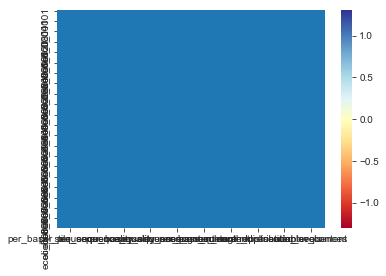

In [15]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [16]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [17]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] == 'fail').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ecoli_00013,fail,warn,pass,pass
ecoli_00069,fail,pass,fail,pass
ecoli_00076,fail,pass,fail,pass


<font size="4">Mark samples as failed.</font>

In [18]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Percent of reads aligned to genome

In [19]:
min_pct_aligned

40

In [20]:
align_cols = ['mRNA-sense','mRNA-antisense','rRNA-sense','rRNA-antisense',
              'tRNA-sense','tRNA-antisense','ncRNA-sense','ncRNA-antisense','unannotated']
total_alignment = DF_qc_stats[align_cols].sum(axis=1)
percent_alignment = total_alignment.divide(DF_qc_stats['total-reads'])*100

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

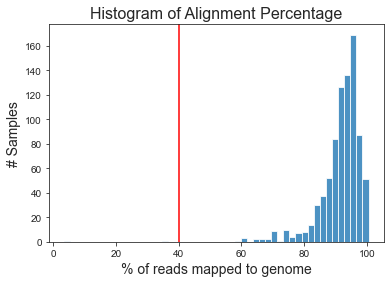

In [21]:
fig,ax = plt.subplots()
ax.hist(percent_alignment,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

In [22]:
DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
DF_failed_mapping

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ecoli_00013,2125647.0,25610.0,0.0,0.0,25610.0,0.0,230492.0,0.0,179271.0,7211277.0,...,8328676,258188956,36639356,219216620,15.094502,0.0135,0.9857,0.0008,0.0,0.0
ecoli_00814,322.0,0.0,1459.0,0.0,0.0,0.0,57.0,0.0,38.0,54835.0,...,54999,2804949,3643,2777505,0.978414,0.0040,0.9960,0.0000,0.0,0.0


In [23]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [24]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

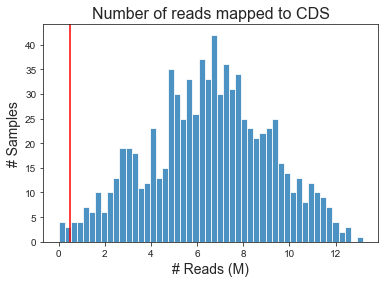

In [25]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['mRNA-sense']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [26]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['mRNA-sense'] < min_mrna_reads].sort_values('mRNA-sense')
DF_failed_mrna

,mRNA-sense,mRNA-antisense,rRNA-sense,rRNA-antisense,tRNA-sense,tRNA-antisense,ncRNA-sense,ncRNA-antisense,unannotated,total-reads,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
ecoli_00814,322.0,0.0,1459.0,0.0,0.0,0.0,57.0,0.0,38.0,54835.0,...,54999,2804949,3643,2777505,0.978414,0.0040,0.9960,0.0000,0.0,0.0
ecoli_00156,92463.0,0.0,46231.0,4438220.0,0.0,0.0,0.0,0.0,0.0,4833809.0,...,4841148,726172200,1536519,656317481,9.619580,0.0275,0.9664,0.0061,0.0,0.0
ecoli_00803,104376.0,0.0,3305235.0,0.0,0.0,0.0,34792.0,0.0,34792.0,3771255.0,...,3772645,192404895,89569,191052343,0.702972,0.0242,0.9738,0.0020,0.0,0.0
ecoli_00403,180501.0,0.0,3971028.0,315877.0,0.0,0.0,0.0,0.0,0.0,4837452.0,...,4846082,489454282,2006772,485061325,0.897521,0.0454,0.9516,0.0030,0.0,0.0
ecoli_00812,281888.0,4474.0,102912.0,0.0,0.0,0.0,40270.0,0.0,22372.0,526662.0,...,527226,26888526,17466,26652263,0.878676,0.0250,0.9733,0.0017,0.0,0.0
ecoli_00801,497761.0,0.0,3755834.0,0.0,0.0,0.0,135753.0,0.0,90502.0,4661655.0,...,4663224,237824424,112130,235961273,0.783414,0.0247,0.9736,0.0017,0.0,0.0


<font size="4">Mark samples as failed.</font>

In [27]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [28]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .2

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  7


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

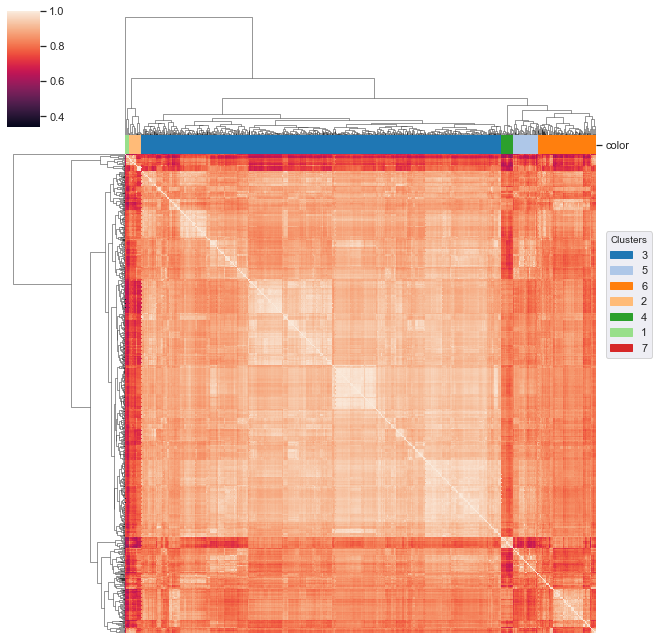

In [30]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

# plt.savefig('../../../QC_figures/cluster.png', bbox_inches = "tight")

<font size="4">Select clusters to remove.</font>

In [31]:
#indicate which clusters you want to remove
remove_clst = []
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index

In [32]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [33]:
DF_metadata.head()

,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,...,Published,Platform,LibraryLayout,Unnamed: 36,Unnamed: 37,Unnamed: 38,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
ecoli_00001,control__wt_glc__1,Control,control,wt_glc,1,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX865357,SRR1787590,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00002,control__wt_glc__2,Control,control,wt_glc,2,Sangwoo Seo,Sangwoo Seo,4/17/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX865358,SRR1787591,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX469840,SRR1168135,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Sangwoo Seo,Sangwoo Seo,10/2/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX469841,SRR1168136,NaN,PAIRED,ILLUMINA,True,True,True,True
ecoli_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Sangwoo Seo,Sangwoo Seo,9/5/13,Escherichia coli K-12 MG1655,MG1655,...,1.0,SRX469838,SRR1168133,NaN,PAIRED,ILLUMINA,True,True,True,True


# Remove failed samples

In [34]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_pct_reads_mapped',
              'passed_global_correlation']

In [35]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

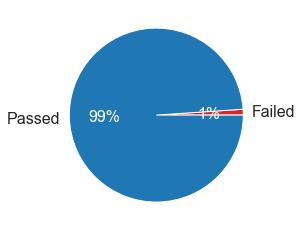

In [36]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [37]:
print(len(DF_metadata_passed))
DF_metadata_passed.project_id.value_counts().sort_values(ascending=False)

828


ros_tale     105
pcoli         94
tcs           62
hot_tale      53
abx_media     30
ica           30
ytf           28
oxyR          24
quinone       22
pal           22
crp           20
acid_tale     20
cck_pgi       19
ssw           18
svns_pgi      16
efeU          16
ytf2          14
omics         14
fps           14
nac_ntrc      14
rpoB          13
ptrc_reg      13
misc2         12
nquinone      12
ytf3          12
minspan       12
cck_pts       10
cck_tpiA      10
cra_crp       10
42c           10
misc           9
cck_gnd        8
pdhr_ale       8
fur            8
cck_sdh        8
oxidative      8
glu            7
acid           7
cck            6
ompr           4
adnB           4
control        2
Name: project_id, dtype: int64

## BioProject counts of all metadata

In [38]:
print(len(DF_metadata))
DF_metadata.project_id.value_counts().sort_values(ascending=False)

837


ros_tale     105
pcoli         94
tcs           62
hot_tale      54
abx_media     30
ica           30
ytf           28
oxyR          24
quinone       22
pal           22
acid_tale     20
crp           20
ssw           19
cck_pgi       19
ptrc_reg      17
efeU          16
svns_pgi      16
nac_ntrc      14
omics         14
fps           14
ytf2          14
minspan       14
rpoB          13
ytf3          12
nquinone      12
misc2         12
42c           10
cck_tpiA      10
cck_pts       10
cra_crp       10
misc           9
fur            8
pdhr_ale       8
cck_sdh        8
acid           8
oxidative      8
cck_gnd        8
glu            7
cck            6
ompr           4
adnB           4
control        2
Name: project_id, dtype: int64

In [39]:
# Store Failed Samples for analysis

DF_metadata_fail_step1 = DF_metadata.loc[DF_metadata.index.difference(DF_metadata_passed.index), :]

DF_metadata_fail_step1.to_csv('metadata_failed_QC_step1.tsv', sep = "\t")

# Create copy here for part 2 
DF_metadata_passed_step1 = DF_metadata_passed.copy()

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. </font>

In [40]:
from tqdm import tqdm_notebook as tqdm
import itertools
from scipy import stats

In [41]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_id'].str.cat(DF_metadata_passed.loc[:,'condition_id'],sep=':')

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [43]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.99


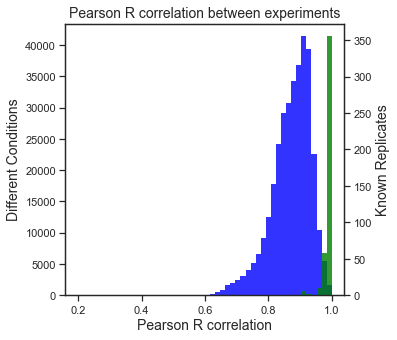

In [44]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [45]:
dissimilar = []
print('Most dissimilar replicates:')
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.9]: #adjusted to be 0.9
    print(x)
    dissimilar.append(x[0][0])
    dissimilar.append(x[0][1])
dissimilar = set(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar) #Changed condition ID to index

Most dissimilar replicates:
(('ecoli_00816', 'ecoli_00817'), 0.8975726835554085)


/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Correlations between replicates

In [46]:
DF_metadata_passed_input = DF_metadata_passed[DF_metadata_passed['passed_similar_replicates']]

<font size=4> First, get a full sample name </font>

In [47]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [49]:
# Drop Samples with no replicates
cond_counts = DF_metadata_passed_input.condition_id.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
print(len(drop_conds))
drop_conds

56


Index(['xyl_ale2', 'nitr_031', 'wt_42c', 'glu_ale5', '42c_ale2', 'glc_xyl_glc',
       'glc_ac_ac2', 'wt_031', 'glc_ale1', 'wt_ptrc20_gln20_glyc', 'glyc_ale1',
       '42c_ale4', 'sdh_ale2', 'delgadx_ph5', '42c_ale8', 'glu_ale8',
       '42c_ale3', 'xyl_ale3', 'delyneJ_ptrc10_gln10_nh4', 'bw_delnac_ade',
       'glu_ale3', '42c_ale10', 'rpoBE546V_044', 'bw_delcra_trp',
       'wt_ptrc20_glu20_glyc', 'rpoBE546V_031', 'wt_xyl', 'glyc_ale2',
       'glc_glyc_glc', 'wt_glu20_glyc', 'rpoBE546V_glc', '5drib_ale10',
       'wt_ade', 'glc_ac_glc1', 'delyiaG_ptrc20_glu20_glyc', 'wt_trp',
       'lyx_ale2_f6', 'glu_ale10', 'wt_044', 'delyneJ_ptrc20_glu20_glyc',
       'delyneJ_glu20_glyc', 'hot_ale3_mid_44c', '42c_ale5', 'glu_ale6',
       'glc_ale2', 'glu_ale9', 'bw_delmntr', '42c_ale9', '42c_ale6',
       'glc_ale3', 'bw_delnac_glc', 'xyl_ale1', 'glc_xyl_xyl', 'bw_delcra_glc',
       'glc_glyc_glyc', '42c_ale1'],
      dtype='object')

In [50]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_id.isin(drop_conds)

# Remove failed samples

In [52]:
qc_columns = ['passed_similar_replicates']

In [53]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

We've determined that the putrescine project has serious issues, let's drop it entirely here:

In [59]:
DF_metadata_final = DF_metadata_final[DF_metadata_final['project_id'] != 'ptrc_reg']

In [63]:
DF_metadata_final.shape

(815, 45)

In [64]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

### Failed Samples analysis - part 2

In [66]:
# Store Failed Samples for analysis

DF_metadata_fail_step2 = DF_metadata_passed.loc[DF_metadata_passed_step1.index.difference(DF_metadata_final.index), :]

DF_metadata_fail_step2.to_csv('meta_data_failed_QC_step2.tsv', sep = "\t")

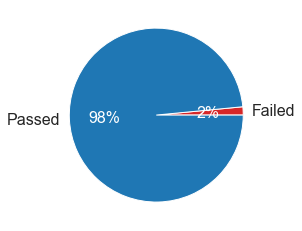

In [67]:
_,_,pcts = plt.pie([len(DF_metadata_fail_step2), len(DF_metadata)],
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

In [68]:
print(len(DF_metadata_fail_step2))

DF_metadata_fail_step2.project_id.value_counts().sort_values(ascending=False)

13


ptrc_reg    13
Name: project_id, dtype: int64

In [69]:
# All Failed

DF_metadata_fail_total = pd.concat([DF_metadata_fail_step1, DF_metadata_fail_step2])

DF_metadata_fail_total.to_csv('meta_data_failed_QC_total.tsv', sep = "\t")

# Save final datasets

<font size=4> Choose a condition as the reference condition. Ideally, this would be the WT strain, grown in the most common base media for your organism. Defined media like M9 or MOPS are preferred, but many organisms only grow on rich media such as LB. </font>

In [70]:
# List all replicates for the reference condition
reference = ['ecoli_00001','ecoli_00002']

In [71]:
# Subtract mean expression of reference from entire dataset
DF_log_tpm_norm = DF_log_tpm_final.sub(DF_log_tpm_final[reference].mean(axis=1),axis=0)

In [72]:
DF_log_tpm_final.to_csv(os.path.join(org_dir,'log_tpm_qc.csv'))
DF_log_tpm_norm.to_csv(os.path.join(org_dir,'log_tpm_norm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(org_dir,'metadata_qc.csv'))